In [0]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import isnull, when, count, col

## Veri Setinin Yüklenmesi/ Loading the Data Set

In [0]:
# File location and type
file_location = "/FileStore/tables/yellow_tripdata_2023_01.parquet"
file_type = "parquet"

df = spark.read.format(file_type) \
  .load(file_location)

display(df)


VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count trip_distance RatecodeID store_and_fwd_flag PULocationID DOLocationID payment_type fare_amount extra mta_tax tip_amount tolls_amount improvement_surcharge total_amount congestion_surcharge airport_fee 2 2023-01-01T00:32:10.000+0000 2023-01-01T00:40:36.000+0000 1.0 0.97 1.0 N 161 141 2 9.3 1.0 0.5 0.0 0.0 1.0 14.3 2.5 0.0 2 2023-01-01T00:55:08.000+0000 2023-01-01T01:01:27.000+0000 1.0 1.1 1.0 N 43 237 1 7.9 1.0 0.5 4.0 0.0 1.0 16.9 2.5 0.0 2 2023-01-01T00:25:04.000+0000 2023-01-01T00:37:49.000+0000 1.0 2.51 1.0 N 48 238 1 14.9 1.0 0.5 15.0 0.0 1.0 34.9 2.5 0.0 1 2023-01-01T00:03:48.000+0000 2023-01-01T00:13:25.000+0000 0.0 1.9 1.0 N 138 7 1 12.1 7.25 0.5 0.0 0.0 1.0 20.85 0.0 1.25 2 2023-01-01T00:10:29.000+0000 2023-01-01T00:21:19.000+0000 1.0 1.43 1.0 N 107 79 1 11.4 1.0 0.5 3.28 0.0 1.0 19.68 2.5 0.0 2 2023-01-01T00:50:34.000+0000 2023-01-01T01:02:52.000+0000 1.0 1.84 1.0 N 161 137 1 12.8 1.0 0.5 10.0 0.0 1.0 27.8 2.5 0.0 2 2023-01-01T00:09:22.000+0000 2023-01-01T00:19:49.000+0000 1.0 1.66 1.0 N 239 143 1 12.1 1.0 0.5 3.42 0.0 1.0 20.52 2.5 0.0 2 2023-01-01T00:27:12.000+0000 2023-01-01T00:49:56.000+0000 1.0 11.7 1.0 N 142 200 1 45.7 1.0 0.5 10.74 3.0 1.0 64.44 2.5 0.0 2 2023-01-01T00:21:44.000+0000 2023-01-01T00:36:40.000+0000 1.0 2.95 1.0 N 164 236 1 17.7 1.0 0.5 5.68 0.0 1.0 28.38 2.5 0.0 2 2023-01-01T00:39:42.000+0000 2023-01-01T00:50:36.000+0000 1.0 3.01 1.0 N 141 107 2 14.9 1.0 0.5 0.0 0.0 1.0 19.9 2.5 0.0 2 2023-01-01T00:53:01.000+0000 2023-01-01T01:01:45.000+0000 1.0 1.8 1.0 N 234 68 1 11.4 1.0 0.5 3.28 0.0 1.0 19.68 2.5 0.0 1 2023-01-01T00:43:37.000+0000 2023-01-01T01:17:18.000+0000 4.0 7.3 1.0 N 79 264 1 33.8 3.5 0.5 7.75 0.0 1.0 46.55 2.5 0.0 2 2023-01-01T00:34:44.000+0000 2023-01-01T01:04:25.000+0000 1.0 3.23 1.0 N 164 143 1 26.1 1.0 0.5 6.22 0.0 1.0 37.32 2.5 0.0 2 2023-01-01T00:09:29.000+0000 2023-01-01T00:29:23.000+0000 2.0 11.43 1.0 N 138 33 1 44.3 6.0 0.5 13.26 0.0 1.0 66.31 0.0 1.25 2 2023-01-01T00:33:53.000+0000 2023-01-01T00:49:15.000+0000 1.0 2.95 1.0 N 33 61 1 17.7 1.0 0.5 4.04 0.0 1.0 24.24 0.0 0.0 2 2023-01-01T00:13:04.000+0000 2023-01-01T00:22:10.000+0000 1.0 1.52 1.0 N 79 186 1 10.0 1.0 0.5 1.25 0.0 1.0 16.25 2.5 0.0 2 2023-01-01T00:45:11.000+0000 2023-01-01T01:07:39.000+0000 1.0 2.23 1.0 N 90 48 1 19.8 1.0 0.5 4.96 0.0 1.0 29.76 2.5 0.0 1 2023-01-01T00:04:33.000+0000 2023-01-01T00:19:22.000+0000 1.0 4.5 1.0 N 113 255 1 20.5 3.5 0.5 4.0 0.0 1.0 29.5 2.5 0.0 1 2023-01-01T00:03:36.000+0000 2023-01-01T00:09:36.000+0000 3.0 1.2 1.0 N 237 239 2 8.6 3.5 0.5 0.0 0.0 1.0 13.6 2.5 0.0 1 2023-01-01T00:15:23.000+0000 2023-01-01T00:29:41.000+0000 2.0 2.5 1.0 N 143 229 2 15.6 3.5 0.5 0.0 0.0 1.0 20.6 2.5 0.0 1 2023-01-01T00:51:45.000+0000 2023-01-01T00:58:18.000+0000 1.0 1.4 1.0 N 137 79 1 9.3 3.5 0.5 2.85 0.0 1.0 17.15 2.5 0.0 1 2023-01-01T00:13:30.000+0000 2023-01-01T00:44:00.000+0000 1.0 17.8 2.0 N 132 116 1 70.0 1.25 0.5 15.85 6.55 1.0 95.15 0.0 1.25 1 2023-01-01T00:21:49.000+0000 2023-01-01T00:29:15.000+0000 4.0 0.8 1.0 N 163 161 4 8.6 3.5 0.5 0.0 0.0 1.0 13.6 2.5 0.0 1 2023-01-01T00:52:06.000+0000 2023-01-01T01:02:18.000+0000 2.0 1.7 1.0 N 161 164 4 11.4 3.5 0.5 0.0 0.0 1.0 16.4 2.5 0.0 2 2023-01-01T00:19:12.000+0000 2023-01-01T00:38:27.000+0000 1.0 5.7 1.0 N 161 87 1 26.8 1.0 0.5 6.36 0.0 1.0 38.16 2.5 0.0 2 2023-01-01T00:31:41.000+0000 2023-01-01T00:51:10.000+0000 1.0 1.18 1.0 N 68 164 1 17.0 1.0 0.5 6.6 0.0 1.0 28.6 2.5 0.0 2 2023-01-01T00:58:49.000+0000 2023-01-01T01:16:03.000+0000 1.0 2.42 1.0 N 164 232 1 17.0 1.0 0.5 4.4 0.0 1.0 26.4 2.5 0.0 1 2023-01-01T00:22:24.000+0000 2023-01-01T00:35:11.000+0000 2.0 2.3 1.0 N 43 262 1 13.5 3.5 0.5 3.7 0.0 1.0 22.2 2.5 0.0 1 2023-01-01T00:40:13.000+0000 2023-01-01T00:43:03.000+0000 1.0 0.7 1.0 N 263 262 1 5.1 3.5 0.5 1.82 0.0 1.0 11.92 2.5 0.0 1 2023-01-01T00:54:05.000+0000 2023-01-01T00:59:36.000+0000 1.0 1.2 1.0 N 263 229 1 7.9 3.5 0.5 2.55 0.0 1.0 15.45 2.5 0.0 1 2023-01-01T00:31:30.000+0000 202

## **Veri Ön İşleme**//Data Preprocessing

### Yolcu Alış ve Bırakış Sürelerinin Tipinin Dönüştürülmesi // Conversion of Passenger Pickup and Drop-off Times

In [0]:
df = df.withColumn('tpep_pickup_datetime', col('tpep_pickup_datetime').cast('timestamp'))
df = df.withColumn('tpep_dropoff_datetime', col('tpep_dropoff_datetime').cast('timestamp'))

### Veri Kümesinin Şemasının Yazdırılması // Printing the Diagram of the Dataset

In [0]:
df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



### Null Değerlerin Tespiti // Detection of Null Values

In [0]:
for c in df.columns:
  print("`{:s}` satırındaki null değer sayısı = {:d}".format(c, df.where(col(c).isNull()).count()))


`VendorID` satırındaki null değer sayısı = 0
`tpep_pickup_datetime` satırındaki null değer sayısı = 0
`tpep_dropoff_datetime` satırındaki null değer sayısı = 0
`passenger_count` satırındaki null değer sayısı = 71743
`trip_distance` satırındaki null değer sayısı = 0
`RatecodeID` satırındaki null değer sayısı = 71743
`store_and_fwd_flag` satırındaki null değer sayısı = 71743
`PULocationID` satırındaki null değer sayısı = 0
`DOLocationID` satırındaki null değer sayısı = 0
`payment_type` satırındaki null değer sayısı = 0
`fare_amount` satırındaki null değer sayısı = 0
`extra` satırındaki null değer sayısı = 0
`mta_tax` satırındaki null değer sayısı = 0
`tip_amount` satırındaki null değer sayısı = 0


### Store_and_fwd_flag ve VendorID Sütunlarının Silinmesi // Deleting Store_and_fwd_flag and VendorID Columns
 
Store_and_fwd_flag sütunu verinin araba hafızasında depolanıp daha sonra gönderilip gönderilmediği bilgisini içeriyor. Bu sütun hem tek kategorik sütun olması hem de bizim amacımız için anlamsız olduğundan silinmiştir. 

VendorID sütunu ise veriyi kaydeden sağlayıcının id'sini gösterdiğinden silinmiştir.

In [0]:
df = df.drop('store_and_fwd_flag', 'VendorID')

### Null Değerlerin Silinmesi // Deleting Null Values

Bizim veri setimizde 3 milyon civarında satır ve yalnızca 71743 satır (%2,33) null değer içerdiğinden null değer olan satırlar çıkarılmıştır.

In [0]:
df = df.dropna()

# Null değer olmadığının gösterilmesi
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|                   0|                    0|              0|            0|         0|           0|           0|           0|          0|    0|      0|         0|           0|                    0|           0|                   0|          0|
+--------------------+------

### Verinin İstatistiksel Özelliklerinin Görüntülenmesi // Displaying Statistical Characteristics of Data

In [0]:
df.describe().toPandas().transpose()  # Pandas DataFrame'e çevrilip transpose ile satır sütünların yeri değiştirilir.

0 
 1 
 2 
 3 
 4 
 
 
 
 
 summary 
 count 
 mean 
 stddev 
 min 
 max 
 
 
 passenger_count 
 2995023 
 1.3625321074328978 
 0.8961199745510026 
 0.0 
 9.0 
 
 
 trip_distance 
 2995023 
 3.436198813831972 
 42.09135148963798 
 0.0 
 62359.52 
 
 
 RatecodeID 
 2995023 
 1.4974395856058536 
 6.4747666839879425 
 1.0 
 99.0 
 
 
 PULocationID 
 2995023 
 166.4399308452723 
 64.06784692466815 
 1 
 265 
 
 
 DOLocationID 
 2995023 
 164.46508290587417 
 69.92720379904178 
 1 
 265 
 
 
 payment_type 
 2995023 
 1.2230961164572025 
 0.5020600425963035 
 1 
 4 
 
 
 fare_amount 
 2995023 
 18.308272437307277 
 17.893249013700697 
 -900.0 
 1160.1 
 
 
 extra 
 2995023 
 1.569119779714551 
 1.795131358511999 
 -7.5 
 12.5 
 
 
 mta_tax 
 2995023 
 0.4880263356909147 
 0.10463915729013075 
 -0.5 
 53.16 
 
 
 tip_amount 
 2995023 
 3.3591933985158047 
 3.84055152209937 
 -96.22 
 380.8 
 
 
 tolls_amount 
 2995023 
 0.5202259615387964 
 2.021864729714521 
 -65.0 
 196.99 
 
 
 improvement_surcharge 
 2995023 
 0.9817241470265604 
 0.18538655715750696 
 -1.0 
 1.0 
 
 
 total_amount 
 2995023 
 26.969763197075103 
 22.26908296748362 
 -751.0 
 1169.4 
 
 
 congestion_surcharge 
 2995023 
 2.274231283031883 
 0.771845410867694 
 -2.5 
 2.5 
 
 
 airport_fee 
 2995023 
 0.10740860754658646 
 0.3556511325197914 
 -1.25 
 1.25

### Yolculuk Süresinin Hesaplanması ve Sıfır veya Negatif Olan Yolculuklarının Silinmesi // Calculating Journey Time and Deleting Zero or Negative Journeys

In [0]:
df = df.withColumn('trip_duration', col('tpep_dropoff_datetime').cast('long') - col('tpep_pickup_datetime').cast('long'))
df = df.filter(col('trip_duration') > 0)
df.filter(col('trip_duration') <= 0).show()  # Sıfır veya negatif bir değer kalmadığının gösterilmesi

+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|trip_duration|
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------

### Toplam Ücretin Negatif Olduğu Sütunların Görüntülenmesi ve Çıkarılması // Displaying and Removing Columns with Negative Total Fee

In [0]:
print("Toplam Ücretin Negatif Olduğu Satır Sayısı:", df.filter(df["total_amount"] < 0).count())
print("Taksimetre Ücretinin Negatif Olduğu Satır Sayısı: ", df.filter(df["fare_amount"] < 0).count())
df.filter((df["total_amount"] < 0) | (df["fare_amount"] < 0)).show()

df = df.filter(df.total_amount >= 0)
df = df.filter(df.fare_amount >=0)

Toplam Ücretin Negatif Olduğu Satır Sayısı: 25154
Taksimetre Ücretinin Negatif Olduğu Satır Sayısı:  24992
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|trip_duration|
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+
| 2023-01-01 00:28:29|  2023-01-01 00:31:03|            1.0|         0.42|       1.0|         233|         229|           

#### Taksinin Hızının Hesaplanması // Calculating the Speed ​​of the Taxi

In [0]:
df = df.withColumn('speed', round(col('trip_distance') / (col('trip_duration') / 3600), 2))
df.show()

+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+-----+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|trip_duration|speed|
+--------------------+---------------------+---------------+-------------+----------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-------------+-----+
| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|         161|         141|           2|        9.3|  1.0|    0.5|       0.0|         0.0|                  1.0|        14.3|  

### Yapılan Ön İşlemlerden Sonra İstatistiksel Özelliklerinin Yeniden Görüntülenmesi // Re-Displaying Statistical Properties After Pre-Processing

In [0]:
df.describe().toPandas().transpose() # Pandas DataFrame'e çevrilip transpose ile satır sütünların yeri değiştirilir.

0 
 1 
 2 
 3 
 4 
 
 
 
 
 summary 
 count 
 mean 
 stddev 
 min 
 max 
 
 
 passenger_count 
 2968767 
 1.362914637625654 
 0.8974650834139217 
 0.0 
 9.0 
 
 
 trip_distance 
 2968767 
 3.443046092872817 
 42.27485540425921 
 0.0 
 62359.52 
 
 
 RatecodeID 
 2968767 
 1.4989546165125118 
 6.4931298283036405 
 1.0 
 99.0 
 
 
 PULocationID 
 2968767 
 166.4704454745017 
 64.06645752278516 
 1 
 265 
 
 
 DOLocationID 
 2968767 
 164.48519200058476 
 69.9019222163139 
 1 
 265 
 
 
 payment_type 
 2968767 
 1.2047937746545956 
 0.45757000527078556 
 1 
 4 
 
 
 fare_amount 
 2968767 
 18.624366462575704 
 17.47427806391104 
 0.0 
 1160.1 
 
 
 extra 
 2968767 
 1.5901115446244227 
 1.7832219135557128 
 0.0 
 12.5 
 
 
 mta_tax 
 2968767 
 0.4963185052919311 
 0.05340525081901216 
 0.0 
 53.16 
 
 
 tip_amount 
 2968767 
 3.387903628005493 
 3.8382684202657207 
 0.0 
 380.8 
 
 
 tolls_amount 
 2968767 
 0.5283384987794155 
 2.019691296183337 
 0.0 
 196.99 
 
 
 improvement_surcharge 
 2968767 
 0.9985671829415812 
 0.03281785390279815 
 0.0 
 1.0 
 
 
 total_amount 
 2968767 
 27.402347984799786 
 21.72864152195286 
 0.0 
 1169.4 
 
 
 congestion_surcharge 
 2968767 
 2.3103657174847334 
 0.6619098826585396 
 0.0 
 2.5 
 
 
 airport_fee 
 2968767 
 0.10982463426735746 
 0.35386351142941863 
 0.0 
 1.25 
 
 
 trip_duration 
 2968767 
 941.2717124651413 
 2591.527288185206 
 1 
 601751 
 
 
 speed 
 2968767 
 13.379227797262553 
 341.5969481806966 
 0.0 
 544752.0

In [0]:
# Let's define some constants which we will use throughout this notebook
NUMERICAL_FEATURES = ["passenger_count",
                      "trip_distance",
                      "RatecodeID",
                      "PULocationID",
                      "DOLocationID",
                      "payment_type",
                      "fare_amount",
                      "extra",
                      "mta_tax",
                      "tip_amount",
                      "tolls_amount",
                      "improvement_surcharge",
                      "total_amount",
                      "congestion_surcharge",
                      "airport_fee",
                      "trip_duration",
                      "speed"]

CATEGORICAL_FEATURES = []

TARGET_VARIABLE = "total_amount"

## Veri Dağılımlarının Analizi: Sayısal Özellikler // Analysis of Data Distributions: Numerical Properties

Her sütunun değerlerinin dağılımının çizilmesi

In [0]:
pdf = df.toPandas()

n_rows = 5
n_cols = 17

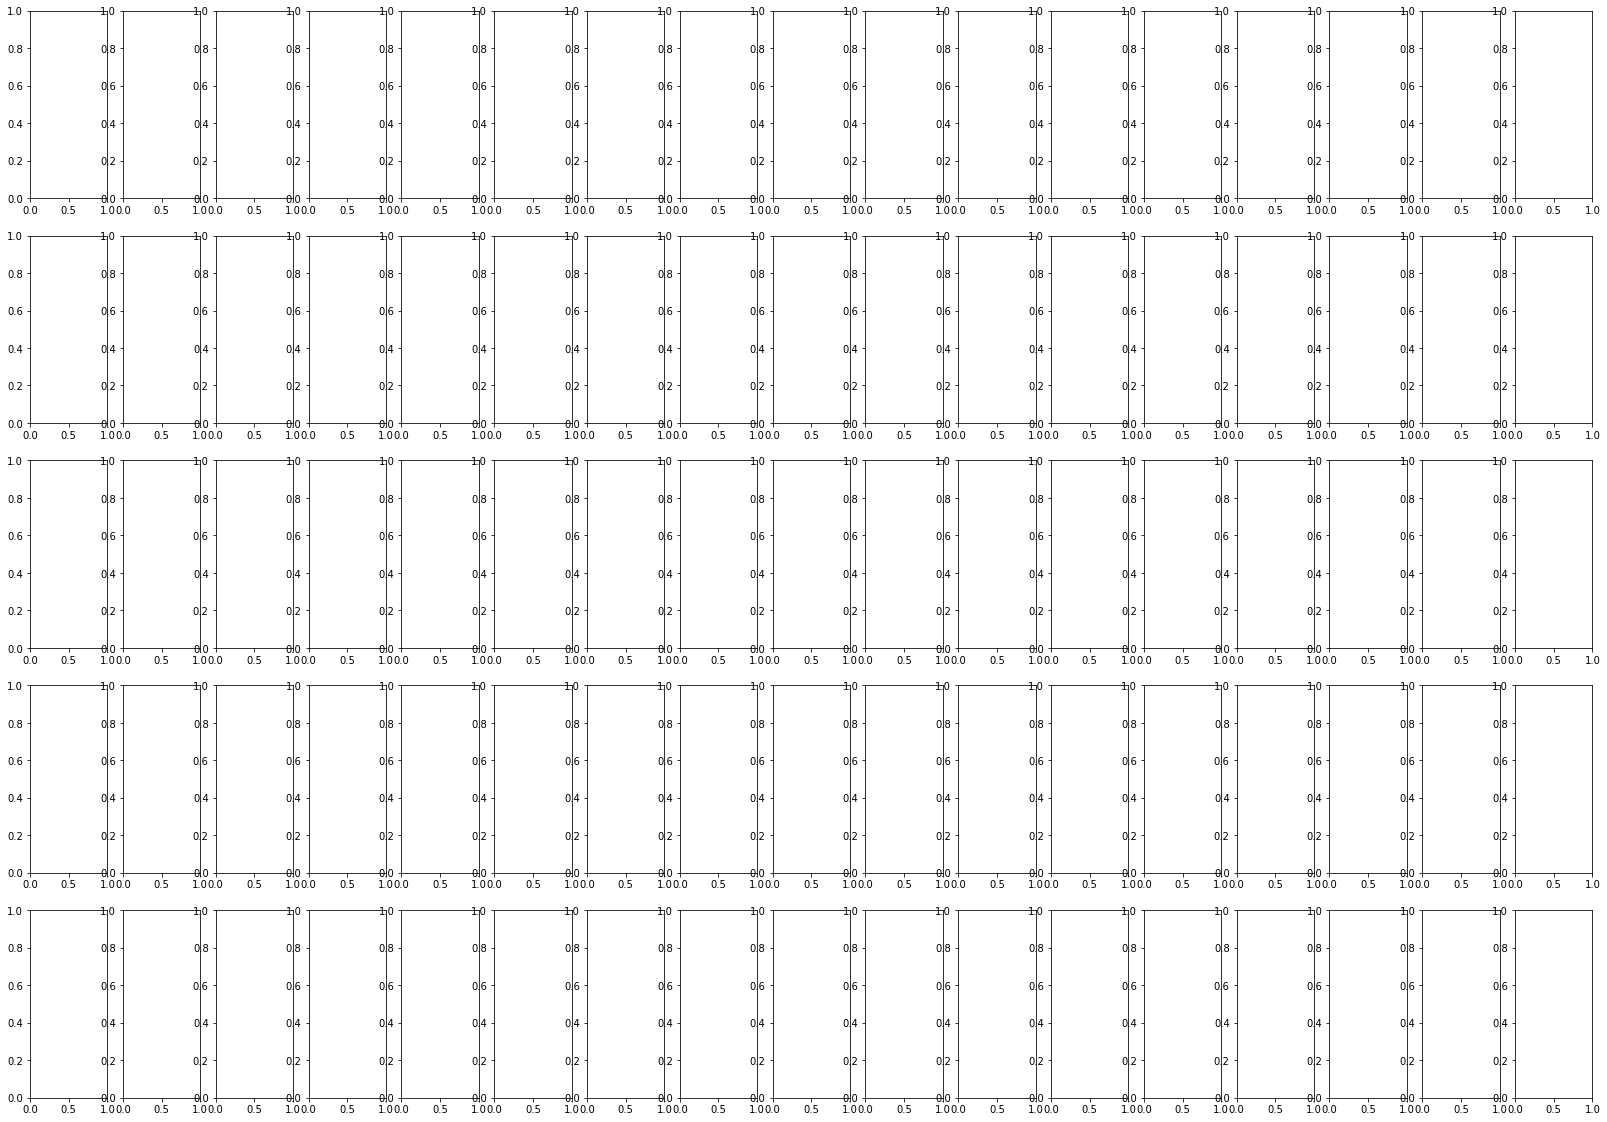

In [0]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(28,20))

In [0]:
for i,f in enumerate(NUMERICAL_FEATURES):
    _ = sns.distplot(pdf[f],
                    kde_kws={"color": "#ca0020", "lw": 1}, 
                    hist_kws={"histtype": "bar", "edgecolor": "k", "linewidth": 1,"alpha": 0.8, "color": "#92c5de"},
                    ax=axes[i]
                    )
    

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-3954649871402464>:2
      1 for i,f in enumerate(NUMERICAL_FEATURES):
----> 2     _ = sns.distplot(pdf[f],
      3                     kde_kws={"color": "#ca0020", "lw": 1}, 
      4                     hist_kws={"histtype": "bar", "edgecolor": "k", "linewidth": 1,"alpha": 0.8, "color": "#92c5de"},
      5                     ax=axes[i]
      6                     )

File /databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2657, in distplot(a, bins, hist, kde, rug, fit, hist_kws, kde_kws, rug_kws, fit_kws, color, vertical, norm_hist, axlabel, label, ax, x)
   2655     line, = ax.plot(0, a.mean())
   2656 else:
-> 2657     line, = ax.plot(a.mean(), 0)
   2658 color = line.get_color()
   2659 line.remove()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [0]:
fig.tight_layout(pad=1.5)

### İkili regresyon grafikleri // Binary regression charts

In [0]:
_ = sns.pairplot(data=pdf, 
                 vars=sorted(NUMERICAL_FEATURES), 
                 hue=TARGET_VARIABLE, 
                 kind="reg",
                 diag_kind='hist',
                 diag_kws = {'alpha':0.55, 'bins':20},
                 markers=["s","X","+"]
                )

## Verilerin Eğitim ve Test Olarak Ayrılması // Separation of Data as Training and Testing

In [0]:
RANDOM_SEED = 42

train_df, test_df = df.randomSplit([0.8, 0.2], seed=RANDOM_SEED)

print("Training set size: {:d} instances".format(train_df.count()))
print("Test set size: {:d} instances".format(test_df.count()))

## Sayısal Verilerin Vektöre Çevrilmesi // Converting Digital Data to Vector

In [0]:
def to_numerical(df, numerical_features, categorical_features, target_variable):
    """
    Args:
        - df: the input dataframe
        - numerical_features: the list of column names in `df` corresponding to numerical features
        - categorical_features: the list of column names in `df` corresponding to categorical features
        - target_variable: the column name in `df` corresponding to the target variable
    Return:
        - transformer: the pipeline of transformation fit to `df` (for future usage)
        - df_transformed: the dataframe transformed according to the pipeline
    """
    
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

    # 1. Create a list of indexers, i.e., one for each categorical feature
    indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid="keep") for c in categorical_features]

    # 2. Create the one-hot encoder for the list of features just indexed (this encoder will keep any unseen label in the future)
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], 
                                    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers], 
                                    handleInvalid="keep")

    # 3. Indexing the target column (i.e., transform it into 0/1) and rename it as "label"
    # Note that by default StringIndexer will assign the value `0` to the most frequent label, which in the case of `deposit` is `no`
    # As such, this nicely resembles the idea of having `deposit = 0` if no deposit is subscribed, or `deposit = 1` otherwise.
    label_indexer = StringIndexer(inputCol = target_variable, outputCol = "label")
    
    # 4. Assemble all the features (both one-hot-encoded categorical and numerical) into a single vector
    assembler = VectorAssembler(inputCols=encoder.getOutputCols() + numerical_features, outputCol="features")

    # 5. Populate the stages of the pipeline
    stages = indexers + [encoder] + [label_indexer] + [assembler]

    # 6. Setup the pipeline with the stages above
    pipeline = Pipeline(stages=stages)

    # 7. Transform the input dataframe accordingly
    transformer = pipeline.fit(df)
    df_transformed = transformer.transform(df)

    # 8. Eventually, return both the transformed dataframe and the transformer object for future transformations
    return transformer, df_transformed

In [0]:
oh_transformer, oh_train_df = to_numerical(train_df, NUMERICAL_FEATURES, CATEGORICAL_FEATURES, TARGET_VARIABLE)

In [0]:
train = oh_train_df.select([TARGET_VARIABLE, "features"])

In [0]:
train.show(5, truncate=False)

## **Eğitim** / Training

#### Lineer Regresyon // Linear Regression

In [0]:
from pyspark.ml.regression import LinearRegression

log_reg = LinearRegression(featuresCol="features", labelCol=TARGET_VARIABLE, maxIter=100, regParam=0.1, elasticNetParam=1)
log_reg_model = log_reg.fit(train)

In [0]:
trainingSummary = log_reg_model.summary

rmse = trainingSummary.rootMeanSquaredError
mse = trainingSummary.meanSquaredError
r2 = trainingSummary.r2

print("Ortalama Karesel Hata:" ,'{:.20f}'.format(mse))
print("Kök Ortalama Karesel Hatası:", '{:.20f}'.format(rmse))
print("R2 Skoru:", '{:.20f}'.format(r2))

In [0]:
oh_test_df = oh_transformer.transform(test_df)

In [0]:
oh_test_df.show(5)

In [0]:
test = oh_test_df.select(["features", TARGET_VARIABLE])
test.show(5)

In [0]:
predictions = log_reg_model.transform(test)

In [0]:
predictions.select("features", "prediction", TARGET_VARIABLE).show(10)

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="rmse")
test_rmse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="mse")
test_mse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="r2")
test_r2 = evaluator.evaluate(predictions)

print("Test MSE:", '{:.20f}'.format(test_mse))
print("Test RMSE:", '{:.20f}'.format(test_rmse))
print("Test R2:", '{:.20f}'.format(test_r2))

#### Random Forest

In [0]:
from pyspark.ml.regression import RandomForestRegressor

# Random Forest modelinin Eğitilmesi
rf = RandomForestRegressor(featuresCol="features", labelCol=TARGET_VARIABLE, numTrees=20, maxDepth=5)
rf_model = rf.fit(train)

In [0]:
# Test verisi üzerinde tahmin yapılması
predictions = rf_model.transform(test)

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="rmse")
test_rmse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="mse")
test_mse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=TARGET_VARIABLE, metricName="r2")
test_r2 = evaluator.evaluate(predictions)

print("Test MSE:", '{:.20f}'.format(test_mse))
print("Test RMSE:", '{:.20f}'.format(test_rmse))
print("Test R2:", '{:.20f}'.format(test_r2))